# Косинусна схожість (Cosine Similarity)

## Де це зустрічається в Machine Learning?
- Косинусна схожість між векторами (наприклад, між двома текстами, представленими як вектори ознак)
- Розрахунок лінійної комбінації ознак у лінійній регресії та нейронних мережах: 
𝑦 = 𝑤⋅𝑥 + 𝑏
- Проєкція вектора на інший вектор

## Що таке косинусна схожість?
Уяви, що в тебе є два стрілочки (це наші вектори), які починаються з однієї точки. Кожна стрілочка показує, який текст ти маєш (наприклад, слова у тексті — це різні напрямки, а числа — це наскільки багато цих слів у тексті).

Косинусна схожість показує, наскільки стрілочки "дивляться" в один бік. Якщо вони зовсім разом — це 1 (тобто дуже схожі тексти), якщо перпендикулярні — це 0 (взагалі не схожі), якщо в протилежні боки — це -1 (прямо протилежні тексти, але це рідко для текстів).

## Простий приклад
Уяви два коротких тексти:

Текст 1: "кіт любить молоко"

Текст 2: "кіт п'є молоко"

Давай зробимо словничок з усіх слів:
[кіт, любить, молоко, п'є]

Тепер представимо кожен текст як набір чисел (вектор):

| слово   | кіт | любить | молоко | п'є |
|---------|-----|--------|--------|-----|
| Текст 1 | 1   | 1      | 1      | 0   |
| Текст 2 | 1   | 0      | 1      | 1   |

Текст 1: [1, 1, 1, 0]
Текст 2: [1, 0, 1, 1]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Визначаємо наші вектори
text1 = np.array([1, 1, 1, 0])
text2 = np.array([1, 0, 1, 1])

# Виводимо вектори
print("Текст 1:", text1)
print("Текст 2:", text2)

Текст 1: [1 1 1 0]
Текст 2: [1 0 1 1]


## Рахуємо косинусну схожість
1. Обчислимо dot product:
1*1 + 1*0 + 1*1 + 0*1 = 1 + 0 + 1 + 0 = 2

In [3]:
# Обчислюємо dot product
dot_product = np.dot(text1, text2)
print("Dot product:", dot_product)

Dot product: 2


2. Знайдемо довжину кожного вектора (норма):

Для Тексту 1:
sqrt(1^2 + 1^2 + 1^2 + 0^2) = sqrt(1 + 1 + 1 + 0) = sqrt(3) ≈ 1.732

Для Тексту 2:
sqrt(1^2 + 0^2 + 1^2 + 1^2) = sqrt(1 + 0 + 1 + 1) = sqrt(3) ≈ 1.732

In [4]:
# Обчислюємо норми векторів
norm_text1 = np.linalg.norm(text1)
norm_text2 = np.linalg.norm(text2)

print("Норма вектора Тексту 1:", norm_text1)
print("Норма вектора Тексту 2:", norm_text2)

Норма вектора Тексту 1: 1.7320508075688772
Норма вектора Тексту 2: 1.7320508075688772


3. Косинусна схожість = dot product / (довжина 1 * довжина 2):

cosine_similarity = 2 / (1.732 * 1.732) = 2 / 3 = 0.666...

In [5]:
# Обчислюємо косинусну схожість вручну
cos_sim_manual = dot_product / (norm_text1 * norm_text2)
print("Косинусна схожість (обчислена вручну):", cos_sim_manual)

# Використовуємо функцію з sklearn
cos_sim_sklearn = cosine_similarity([text1], [text2])[0][0]
print("Косинусна схожість (використовуючи sklearn):", cos_sim_sklearn)

Косинусна схожість (обчислена вручну): 0.6666666666666667
Косинусна схожість (використовуючи sklearn): 0.6666666666666669


## Що це означає?
0.67 — це означає, що тексти схожі між собою приблизно на 67%.
Якщо б вони були однакові, було б 1. Якщо зовсім різні — ближче до 0.

Формула косинусної схожості — це класична формула для косинуса кута між двома векторами:

$cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{\|\vec{a}\| \|\vec{b}\|}$

## Візуалізація косинусної схожості

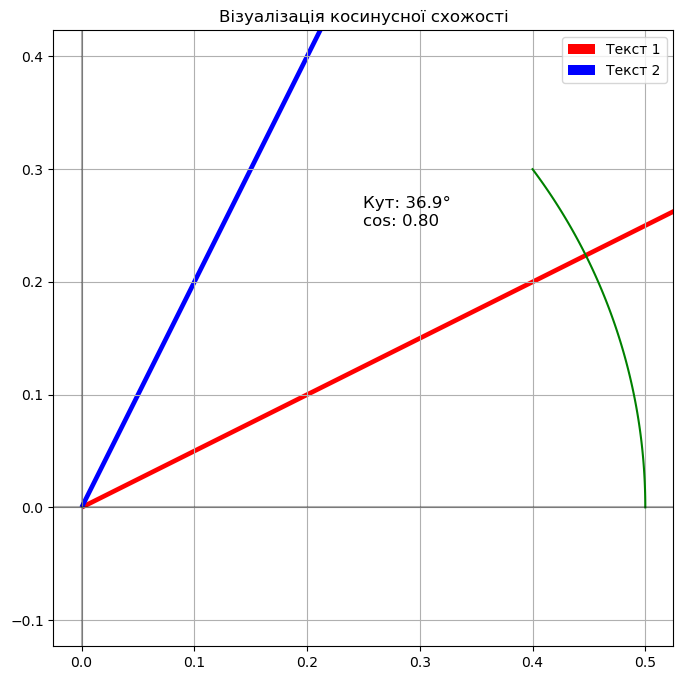

In [6]:
# Створюємо спрощену 2D візуалізацію
# Для цього ми проектуємо наші 4D вектори на 2D простір
# Це спрощення для наочності

# Створюємо фігуру
plt.figure(figsize=(8, 8))

# Малюємо вектори (спрощені для 2D візуалізації)
vector1 = [2, 1]  # Спрощений вектор для text1
vector2 = [1, 2]  # Спрощений вектор для text2

# Початок координат
origin = [0, 0]

# Малюємо вектори
plt.quiver(*origin, *vector1, color='r', angles='xy', scale_units='xy', scale=1, label='Текст 1')
plt.quiver(*origin, *vector2, color='b', angles='xy', scale_units='xy', scale=1, label='Текст 2')

# Додаємо кут між векторами
cos_angle = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
angle = np.arccos(cos_angle)
angle_degrees = np.degrees(angle)

# Додаємо дугу, що показує кут
radius = 0.5
angle_range = np.linspace(0, angle, 100)
x = radius * np.cos(angle_range)
y = radius * np.sin(angle_range)
plt.plot(x, y, 'g-')

# Додаємо текст з величиною кута та косинусною схожістю
plt.text(radius/2, radius/2, f'Кут: {angle_degrees:.1f}°\ncos: {cos_angle:.2f}', fontsize=12)

# Налаштовуємо графік
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('Візуалізація косинусної схожості')
plt.legend()
plt.axis('equal')
plt.show()